## Ensemble Methods (앙상블 기법)


In [1]:
from scipy.special import comb 
import math
import numpy as np

### Majority Voting 
### Weighted Vote Classifier

In [2]:
np.argmax(np.bincount([0, 0, 1], weights=[0.2, 0.2, 0.6])) # 출력값이 label일 때

1

In [3]:
ex = np.array([[0.9, 0.1], #->0
               [0.8, 0.2], #->0
               [0.4, 0.6]]) # ->1

p = np.average(ex, axis=0, weights=[0.05, 0.05, 0.9]) # 행렬의 1열과 2열에 각각 곱한결 과 더큰쪽이(1열:0, 2열:!)
np.argmax(p)  # 출력값이 class probability일 때

1

In [4]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

## 1. Simple Ensemble

In [5]:
data = load_wine()

data.data.shape

X = data.data
y = data.target

le = LabelEncoder() #label을 0에서부터 시작하게 만들어줌
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                             test_size=0.2, 
                             random_state=1,
                             stratify=y)

In [6]:
np.unique(y)

array([0, 1, 2], dtype=int64)

In [7]:
np.unique(X)

array([1.300000e-01, 1.400000e-01, 1.700000e-01, 1.900000e-01,
       2.000000e-01, 2.100000e-01, 2.200000e-01, 2.400000e-01,
       2.500000e-01, 2.600000e-01, 2.700000e-01, 2.800000e-01,
       2.900000e-01, 3.000000e-01, 3.100000e-01, 3.200000e-01,
       3.300000e-01, 3.400000e-01, 3.500000e-01, 3.700000e-01,
       3.900000e-01, 4.000000e-01, 4.100000e-01, 4.200000e-01,
       4.300000e-01, 4.400000e-01, 4.500000e-01, 4.700000e-01,
       4.800000e-01, 4.900000e-01, 5.000000e-01, 5.100000e-01,
       5.200000e-01, 5.300000e-01, 5.400000e-01, 5.500000e-01,
       5.600000e-01, 5.700000e-01, 5.800000e-01, 5.900000e-01,
       6.000000e-01, 6.100000e-01, 6.200000e-01, 6.300000e-01,
       6.400000e-01, 6.500000e-01, 6.600000e-01, 6.700000e-01,
       6.800000e-01, 6.900000e-01, 7.000000e-01, 7.200000e-01,
       7.300000e-01, 7.400000e-01, 7.500000e-01, 7.600000e-01,
       7.700000e-01, 7.800000e-01, 7.900000e-01, 8.000000e-01,
       8.100000e-01, 8.200000e-01, 8.300000e-01, 8.4000

In [7]:
X.shape

(178, 13)

In [8]:
y.shape

(178,)

In [8]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [9]:
models = [
    ('knn', KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')),
    ('lr', LogisticRegression(penalty='l2', C=0.001, random_state=1,max_iter=10000)),
    ('dt',DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0))
]
#앙상블할 모델 3개 (이질적 앙상블)

In [10]:
knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn.fit(X_train, y_train)
print('knn accr:',accuracy_score(knn.predict(X_test), y_test)) #accircy_score(예측값,정답)

knn accr: 0.7777777777777778


In [11]:
knn.predict_proba(X_test)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [12]:
lr = LogisticRegression(penalty='l2', C=0.001, random_state=1,max_iter=10000)
lr.fit(X_train, y_train)
print('lr accr:',accuracy_score(lr.predict(X_test), y_test))

lr accr: 0.7222222222222222


In [13]:
dt = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
#depth를 1로 설정해서 각 구역에있는 데이터의 개수로 비율 나타냄
dt.fit(X_train, y_train)
print('dt accr:',accuracy_score(dt.predict(X_test), y_test))

dt accr: 0.6111111111111112


In [14]:
dt.predict_proba(X_test)

array([[0.51648352, 0.48351648, 0.        ],
       [0.51648352, 0.48351648, 0.        ],
       [0.        , 0.25490196, 0.74509804],
       [0.51648352, 0.48351648, 0.        ],
       [0.        , 0.25490196, 0.74509804],
       [0.51648352, 0.48351648, 0.        ],
       [0.        , 0.25490196, 0.74509804],
       [0.51648352, 0.48351648, 0.        ],
       [0.        , 0.25490196, 0.74509804],
       [0.        , 0.25490196, 0.74509804],
       [0.51648352, 0.48351648, 0.        ],
       [0.51648352, 0.48351648, 0.        ],
       [0.51648352, 0.48351648, 0.        ],
       [0.        , 0.25490196, 0.74509804],
       [0.51648352, 0.48351648, 0.        ],
       [0.51648352, 0.48351648, 0.        ],
       [0.        , 0.25490196, 0.74509804],
       [0.51648352, 0.48351648, 0.        ],
       [0.51648352, 0.48351648, 0.        ],
       [0.51648352, 0.48351648, 0.        ],
       [0.51648352, 0.48351648, 0.        ],
       [0.51648352, 0.48351648, 0.        ],
       [0.

In [15]:
hard_vote  = VotingClassifier(models, voting='hard')
hard_vote.fit(X_train, y_train)
print('hard vote accr:',accuracy_score(hard_vote.predict(X_test), y_test))

hard vote accr: 0.8055555555555556


In [16]:
soft_vote  = VotingClassifier(models, voting='soft')
soft_vote.fit(X_train, y_train)
print('soft vote accr:',accuracy_score(soft_vote.predict(X_test), y_test))

soft vote accr: 0.8055555555555556


## 2. Bagging

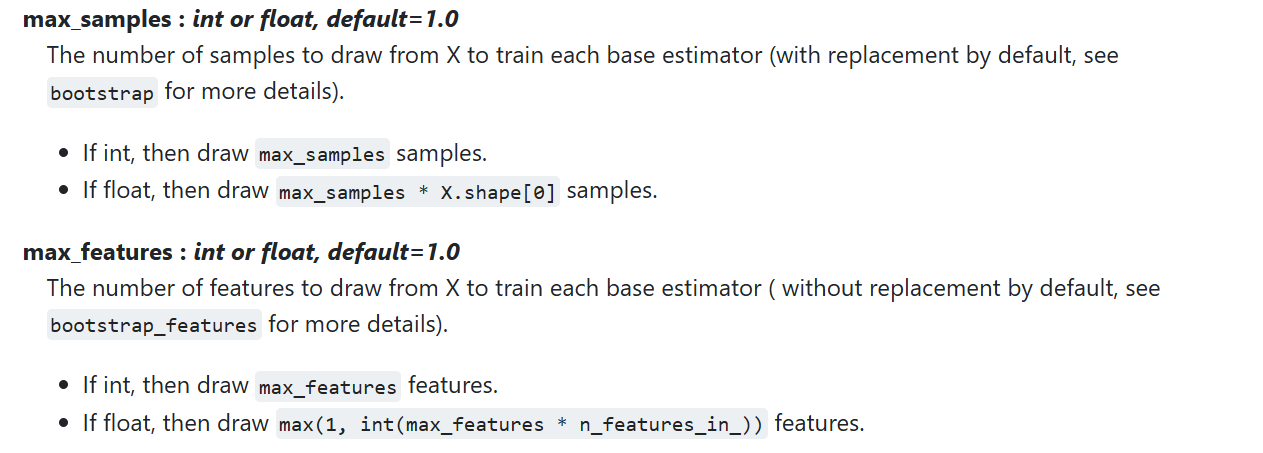

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=3,
                              random_state=1)

bag = BaggingClassifier(estimator=tree,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        n_jobs=1, 
                        random_state=1)

In [26]:
from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)#개별 트리 학습
y_train_pred = tree.predict(X_train)#훈련 데이터셋에 대한 예측값
y_test_pred = tree.predict(X_test) #테스트셋에 대한 예측값

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Decision tree train/test accuracies 1.000/0.889
Bagging train/test accuracies 1.000/0.972


## 3. Random Forest

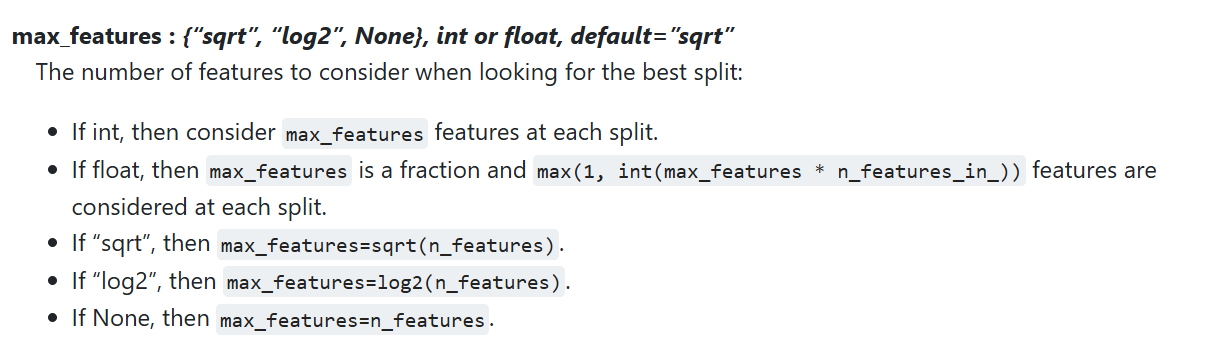

randomforest는 Bagging과 달리 feature까지 선택

In [23]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=500, 
                                max_depth=3,
                                max_features='log2',
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)



RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       n_estimators=500, n_jobs=2, random_state=1)

In [24]:
rf_train = accuracy_score(y_train, forest.predict(X_train)) 
rf_test = accuracy_score(y_test,  forest.predict(X_test)) 
print('Randomforest train/test accuracies %.3f/%.3f'
      % (rf_train, rf_test))

Randomforest train/test accuracies 1.000/1.000


## 4. AdaBoost

In [27]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1,
                              random_state=1)

ada = AdaBoostClassifier(estimator=tree,
                         n_estimators=1000, 
                         learning_rate=0.1,
                         random_state=1)

In [28]:
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

Decision tree train/test accuracies 0.599/0.611


C:\Users\j2982\Anaconda 3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost train/test accuracies 0.866/0.917


C:\Users\j2982\Anaconda 3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


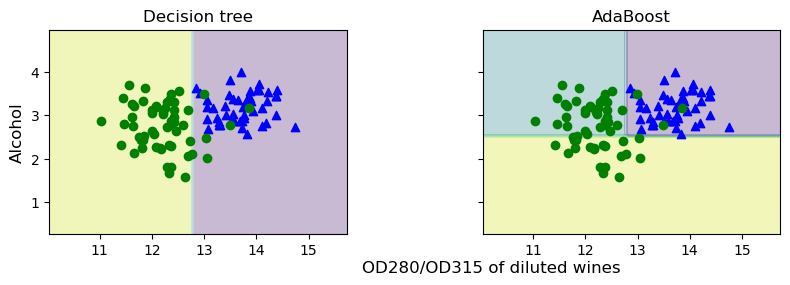

In [31]:
import matplotlib.pyplot as plt
X = data.data[:,[0,-2]] #feature 0번째,-2번째를 골라서 사용
y = data.target

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                             test_size=0.2, 
                             random_state=1,
                             stratify=y)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(8, 3))


for idx, clf, tt in zip([0, 1],
                        [tree, ada],
                        ['Decision tree', 'AdaBoost']):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c='green', marker='o')
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -0.5,
         s='OD280/OD315 of diluted wines',
         ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()

In [34]:
X_train.shape

(142, 2)